In [272]:
from scipy.signal import butter, lfilter
from scipy.io import wavfile

def butter_bandpass(lowcut, highcut, fs, order=5):
    return butter(order, [lowcut, highcut], fs=fs, btype='band')

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


if __name__ == "__main__":
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.signal import freqz

    ####################
    i = 0
    for filename in ["afsk_clean.wav", "afsk_mild_noise.wav", "white_noise.wav", "real_signal.wav"]:
        samplerate, data = wavfile.read(filename)
        data = data[:500]

        ORDER = 2

        l1 = 1000
        u1 = 1400
        l2 = 2000
        u2 = 2400
        total_range =  u1 - l1 + u2 - l2

        lower = butter_bandpass_filter(data, l1, u1, samplerate, order=ORDER)
        upper = butter_bandpass_filter(data, l2, u2, samplerate, order=ORDER)
        combo = (lower + upper) / total_range

        # l1 = 100
        # l2 = 1400
        # u2 = 2000
        # u1 = 1000
        # l3 = 2400
        # u3 = 8000
        # total_range = u1 - l1 + u2 - l2 + u3 - l3

        l1 = 500
        u1 = 2700
        total_range = u1 - l1
        outer_low = butter_bandpass_filter(data, l1, u1, samplerate, order=ORDER)
        outer_low = (outer_low / total_range) + 0.5
        # outer_mid = butter_bandpass_filter(data, l2, u2, samplerate, order=ORDER)
        # outer_high = butter_bandpass_filter(data, l3, u3, samplerate, order=ORDER)
        # outer_combo = (outer_low + outer_mid + outer_high) / total_range

        rms = np.sqrt(np.mean(np.square(combo)))
        outer_rms = np.sqrt(np.mean(np.square(outer_low)))

        print()
        print(filename)
        print("RMS: ", rms, "Outer RMS: ", outer_rms)
        print("SNR", 20*np.log10(rms/outer_rms), "dB")


afsk_clean.wav
RMS:  6.6005392988573 Outer RMS:  2.947655729887924
SNR 7.002053244362203 dB

afsk_mild_noise.wav
RMS:  6.614045611458308 Outer RMS:  2.9587799417088374
SNR 6.987090393936313 dB

white_noise.wav
RMS:  0.06414467582466307 Outer RMS:  0.5006882011337412
SNR -17.848134852168048 dB

real_signal.wav
RMS:  1.2563248950141592 Outer RMS:  0.8580512209798267
SNR 3.3117750418375183 dB


<Figure size 640x480 with 0 Axes>

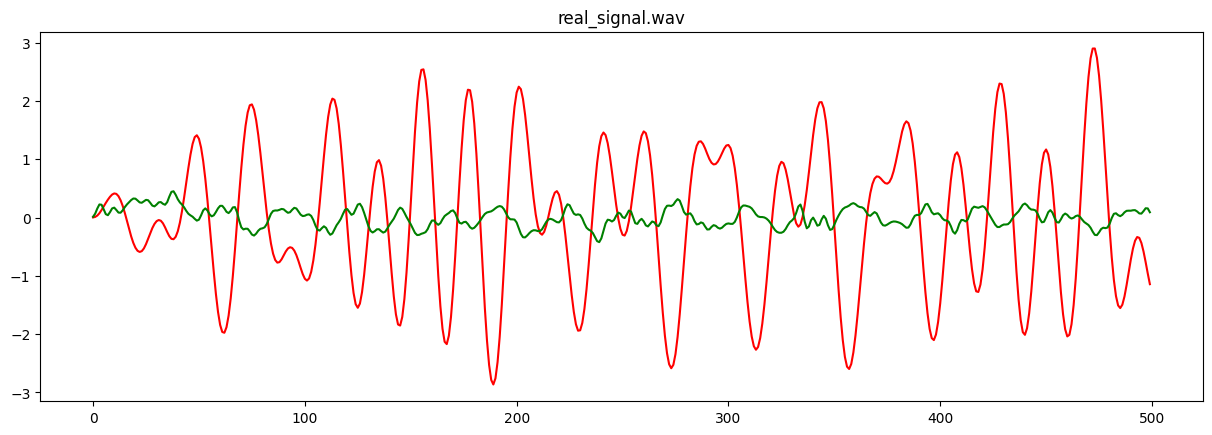

<Figure size 640x480 with 0 Axes>

In [273]:

        plt.figure(i)
        i += 1
        plt.figure().set_figwidth(15)
        plt.title(filename)
        # plt.plot(data, color='gray')
        # plt.plot(lower)
        # plt.plot(upper)
        plt.plot(combo, color='red')

        plt.plot(outer_combo, color='green')

        plt.show()
        plt.clf()
    ####################


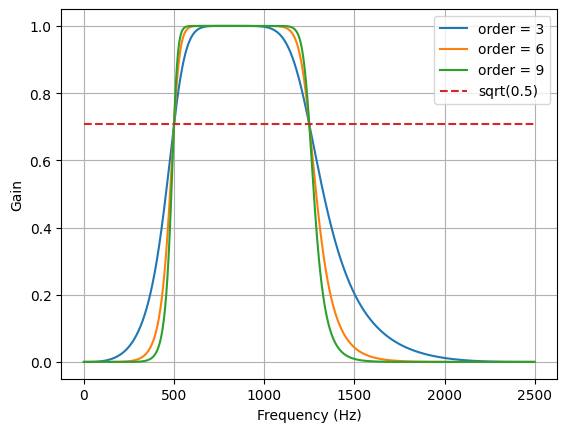

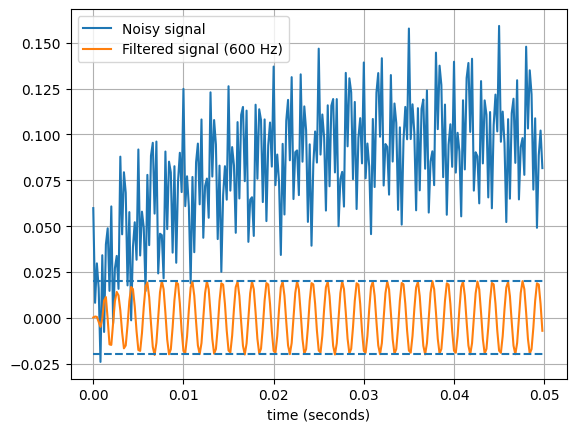

In [274]:

    # Sample rate and desired cutoff frequencies (in Hz).
    fs = 5000.0
    lowcut = 500.0
    highcut = 1250.0

    # Plot the frequency response for a few different orders.
    plt.figure(2)
    plt.clf()
    for order in [3, 6, 9]:
        b, a = butter_bandpass(lowcut, highcut, fs, order=order)
        w, h = freqz(b, a, fs=fs, worN=2000)
        plt.plot(w, abs(h), label="order = %d" % order)

    plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)],
             '--', label='sqrt(0.5)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain')
    plt.grid(True)
    plt.legend(loc='best')

    # Filter a noisy signal.
    T = 0.05
    nsamples = T * fs
    t = np.arange(0, nsamples) / fs
    a = 0.02
    f0 = 600.0
    x = 0.1 * np.sin(2 * np.pi * 1.2 * np.sqrt(t))
    x += 0.01 * np.cos(2 * np.pi * 312 * t + 0.1)
    x += a * np.cos(2 * np.pi * f0 * t + .11)
    x += 0.03 * np.cos(2 * np.pi * 2000 * t)
    plt.figure(3)
    plt.clf()
    plt.plot(t, x, label='Noisy signal')

    y = butter_bandpass_filter(x, lowcut, highcut, fs, order=6)
    plt.plot(t, y, label='Filtered signal (%g Hz)' % f0)
    plt.xlabel('time (seconds)')
    plt.hlines([-a, a], 0, T, linestyles='--')
    plt.grid(True)
    plt.axis('tight')
    plt.legend(loc='upper left')

    plt.show()